In [12]:
#Numpy - for scientific computing
import numpy as np
import scipy
from scipy import optimize
from scipy.optimize import curve_fit 

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import lmfit

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

In [13]:
#Import files and add the names as strings to an array
file_path = '../../analyzed_data/gliding/'
ff1 = '2023-07-10_Gliding/'
ff2 = '2023-07-11_Gliding/'
ff3 = '2023-07-12_Gliding/'
ff4 = '2023-08-11_Gliding/'
ff5 = '2023-08-15_Gliding/'
ff6 = '2023-08-16_Gliding/'
ff7 = '2023-08-17_Gliding/'
ff8 = '2023-08-18_Gliding/'
ff9 = '2023-09-07_Gliding/'
ff = [ff1, ff2, ff3, ff4, ff5, ff6, ff7, ff8, ff9]
included_files = '*.csv'

data_csv = []
for file_folder in ff:
    path = file_path+file_folder+included_files
    files = np.sort(glob.glob(path))
    data_csv.append(files)
data_csv = np.concatenate(data_csv)

#Convert file names to a dataframe
dfs = []
for file in data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    dfs.append(temp_df)
df=pd.concat(dfs)

#reset the index and drop any extraneous columns
df=df.reset_index()
df=df.drop(columns=['Unnamed: 0', 'level_0'])

In [14]:
df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,skele r^2,MT len (um),motor conc,MT dilute,ATP,ADP,P,time (seconds),date,file_name
0,0,38,38.664683,6.083507,28.157895,286.263158,1.409637,1,55.942036,0.923608,0.949581,3.475225,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
1,2,19,21.908902,0.000000,29.000000,243.000000,1.570796,4,38.253891,0.987443,0.977423,2.165416,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
2,6,41,48.014455,1.788818,89.000000,166.609756,0.169339,10,57.566606,0.980215,0.932844,5.442741,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
3,7,22,31.639965,2.635461,82.454545,465.863636,0.657876,13,45.983571,0.988882,0.987238,2.266331,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
4,9,35,43.105455,2.065787,98.942857,281.000000,-1.214058,17,93.540271,0.923645,0.822027,4.066268,0.3300,2000.0,1410.0,0.0,0.0,600.0,2023-07-10,2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,37,17,19.786944,1.202383,360.000000,41.705882,-0.139325,79,40.384525,0.860731,0.821151,2.513992,0.0625,200.0,44.0,0.0,0.0,1850.0,2023-09-07,2023-09-07_Gliding_0.0625uMNCD_200MT_44uMATP_0...
5365,39,40,46.422533,1.307070,373.500000,139.450000,-0.103651,81,38.442857,0.965722,0.913337,6.339012,0.0625,200.0,44.0,0.0,0.0,1850.0,2023-09-07,2023-09-07_Gliding_0.0625uMNCD_200MT_44uMATP_0...
5366,41,22,25.400661,2.023781,384.500000,56.818182,-0.043161,84,26.243193,0.857760,0.791259,3.437163,0.0625,200.0,44.0,0.0,0.0,1850.0,2023-09-07,2023-09-07_Gliding_0.0625uMNCD_200MT_44uMATP_0...
5367,47,26,30.708844,1.294981,447.500000,117.884615,-0.215472,95,27.982689,0.976472,0.833606,3.767893,0.0625,200.0,44.0,0.0,0.0,1850.0,2023-09-07,2023-09-07_Gliding_0.0625uMNCD_200MT_44uMATP_0...


In [15]:
df[df['ATP']==1410.0][df['motor conc']==0.0625]['MT dilute'].unique()

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/1860627692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['ATP']==1410.0][df['motor conc']==0.0625]['MT dilute'].unique()


array([200.,  50.])

In [16]:
dates = np.sort(np.unique(df['date']))
datesnum = np.arange(len(dates))
datedic = dict(zip(dates, datesnum))

normalize = mcolors.Normalize(vmin=0, vmax=datesnum.max())
colormap = cm.cool
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(dates)

In [17]:
dates

array(['2023-07-10', '2023-07-11', '2023-07-12', '2023-08-11',
       '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
       '2023-09-07'], dtype=object)

### Calculate r^2

$$r^2 = 1 - \frac{\Sigma (y_i - f_i)^2}{\Sigma (y_i - y_{avg})^2}$$


In [18]:
def rsqrd(xvals, yvals, slope, intercept):
    fit = slope*xvals+intercept
    ssres = np.sum((yvals - fit)**2)
    sstot = np.sum((yvals - np.average(yvals))**2)
    rsq = 1 - ssres/sstot
    return rsq

# Motor Concentration
1410 ATP, 0 ADP, 0 P

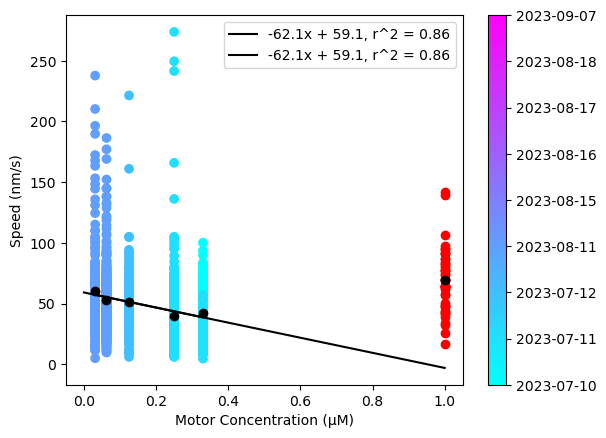

In [63]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mot_mean = df_plot.groupby('motor conc').mean().reset_index()

fig, ax = plt.subplots()

ax.scatter(df_plot['motor conc'], 
            df_plot['speed (nm/s)'], 
            c = colormap(normalize([datedic[date] for date in df_plot['date']])))
ax.scatter(mot_mean['motor conc'], mot_mean['speed (nm/s)'], c='k')
ax.scatter(Glut_df['motor conc'], Glut_df['speed (nm/s)'], color='red')
ax.scatter(1, Glut_df['speed (nm/s)'].mean(), color='k')
motconcfit = np.polyfit(mot_mean['motor conc'], mot_mean['speed (nm/s)'], deg=1)
motrsq = rsqrd(mot_mean['motor conc'], mot_mean['speed (nm/s)'], motconcfit[0], motconcfit[1])
ax.plot(mot_mean['motor conc'], motconcfit[0]*mot_mean['motor conc'] + motconcfit[1], 
         color='k', 
         label=str(round(motconcfit[0],1)) + 'x + ' + str(round(motconcfit[1],1)) + ', r^2 = ' + str(round(motrsq, 2)))
ax.plot(np.arange(0,1.1,0.1), motconcfit[0]*np.arange(0,1.1,0.1) + motconcfit[1], 
         color='k', 
         label=str(round(motconcfit[0],1)) + 'x + ' + str(round(motconcfit[1],1)) + ', r^2 = ' + str(round(motrsq, 2)))
ax.legend()
ax.set_xlabel('Motor Concentration (µM)')
ax.set_ylabel('Speed (nm/s)')
#ax.set_ylim(10,70)
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MotConcVSpeed.pdf')

## Look at the distribution of the data

In [40]:
def ecdf(array):
    arsort = np.sort(array)
    perc = np.arange(len(array))/len(array)
    return perc

In [41]:
def invgamma(alpha, beta, y):
    return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/4117647006.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


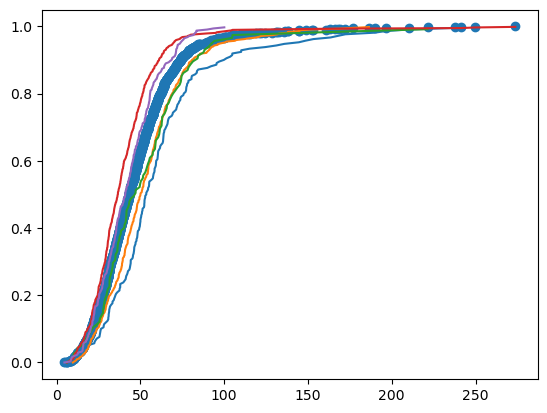

In [42]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
plt.scatter(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']))
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])
for conc in motor_concs[:-1]:
    df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] == conc), :]
    plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']))

In [43]:
np.median(df_plot['speed (nm/s)'])

40.887443438914005

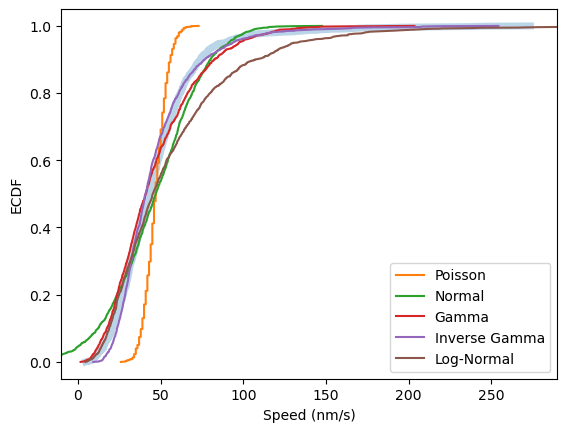

In [44]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])

plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']), alpha=0.3, lw=5)

poisgen = np.random.poisson(lam=mean, size=len(df_plot))
plt.plot(np.sort(poisgen), ecdf(poisgen), label='Poisson')

normgen = np.random.normal(mean, stdv, size = len(df_plot))
plt.plot(np.sort(normgen), ecdf(normgen), label='Normal')

alpha = mean**2 / stdv**2
beta = mean / stdv**2
gammagen = np.random.gamma(alpha, 1/beta, size=len(df_plot))
plt.plot(np.sort(gammagen), ecdf(gammagen), label='Gamma')

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammagen = 1 / np.random.gamma(alpha, 1/beta, size=len(df_plot))
plt.plot(np.sort(invgammagen), ecdf(invgammagen), label='Inverse Gamma')

sigma = np.sqrt(np.log(stdv/mean + 1))
mu = np.log(mean/ np.sqrt(stdv/mean**2 + 1))
lognormgen = np.random.lognormal(mu, sigma, size=len(df_plot))
plt.plot(np.sort(lognormgen), ecdf(lognormgen), label='Log-Normal')


plt.xlim(-10, 290)
plt.xlabel("Speed (nm/s)")
plt.ylabel("ECDF")
plt.legend()

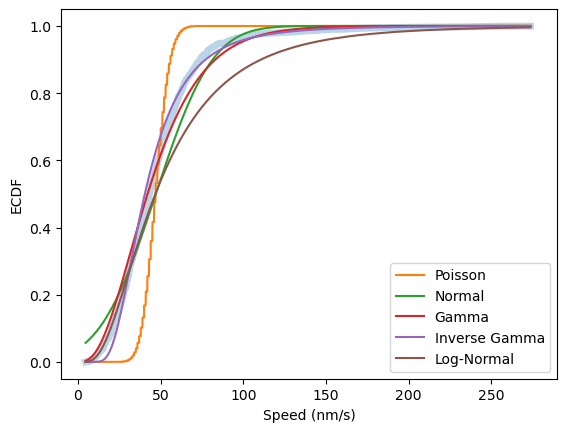

In [45]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])

speeds = np.sort(df_plot['speed (nm/s)'])

plt.plot(speeds, ecdf(speeds), alpha=0.3, lw=5)

poisdist = scipy.stats.poisson.cdf(speeds, mean)
plt.plot(speeds, poisdist, label='Poisson')

normdist = scipy.stats.norm.cdf(speeds, mean, stdv)
plt.plot(speeds, normdist, label='Normal')

alpha = mean**2 / stdv**2
beta = mean / stdv**2
gammadist = scipy.stats.gamma.cdf(speeds, alpha, scale=1/beta)
plt.plot(speeds, gammadist, label='Gamma')

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammadist = scipy.stats.invgamma.cdf(speeds, alpha, loc=0, scale=beta)
plt.plot(speeds, invgammadist, label='Inverse Gamma')

sigma = np.sqrt(np.log(stdv/mean + 1))
mu = np.log(mean/ np.sqrt(stdv/mean**2 + 1))
lognormdist = scipy.stats.lognorm.cdf(speeds, sigma, scale=np.exp(mu))
plt.plot(speeds, lognormdist, label='Log-Normal')


plt.xlim(-10, 290)
plt.xlabel("Speed (nm/s)")
plt.ylabel("ECDF")
plt.legend()
#plt.savefig('../../analyzed_data/gliding/figures/distributions.pdf')

In [46]:
invgammafit

NameError: name 'invgammafit' is not defined

In [47]:
np.arange(np.max(df_plot['speed (nm/s)']))

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)
/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: invalid value encountered in multiply
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)


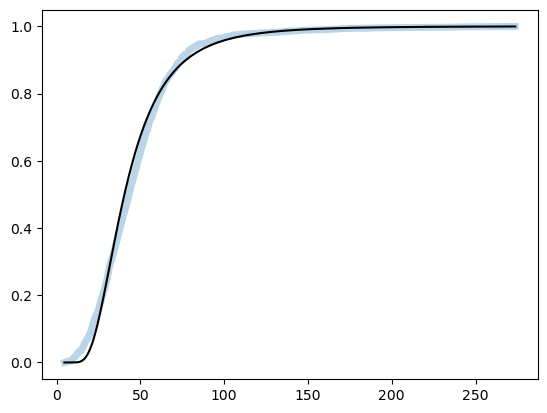

In [48]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])
plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']), alpha=0.3, lw=5)

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammafit = invgamma(alpha, beta, np.arange(np.max(df_plot['speed (nm/s)'])))

plt.plot(np.sort(df_plot['speed (nm/s)']), scipy.stats.invgamma.cdf(np.sort(df_plot['speed (nm/s)']), alpha, loc=0, scale=beta), c='k')

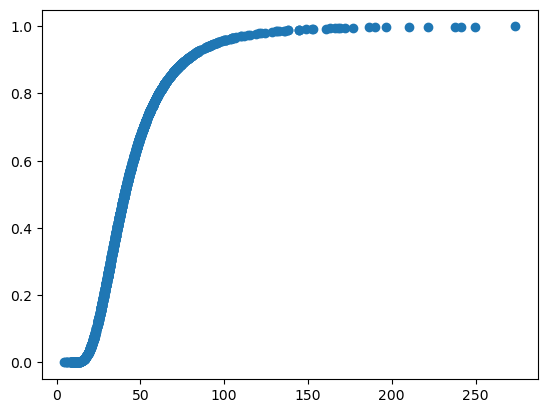

In [49]:
plt.scatter(df_plot['speed (nm/s)'], scipy.stats.invgamma.cdf(df_plot['speed (nm/s)'], alpha, loc=0, scale=beta))

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)
/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: invalid value encountered in multiply
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)


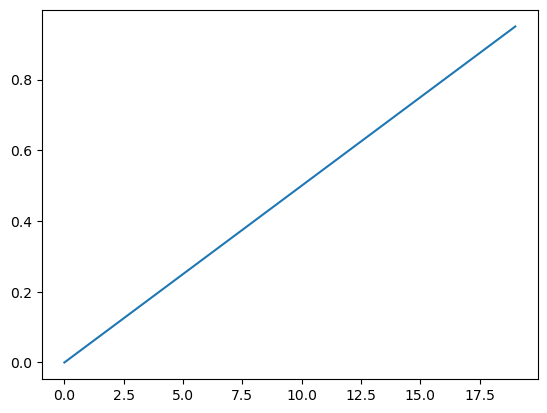

In [50]:
plt.plot(np.arange(20), ecdf(invgamma(0.5, 1, np.arange(20))))

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/2597652675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


Text(0.5, 0.01, 'Speed (nm/s)')

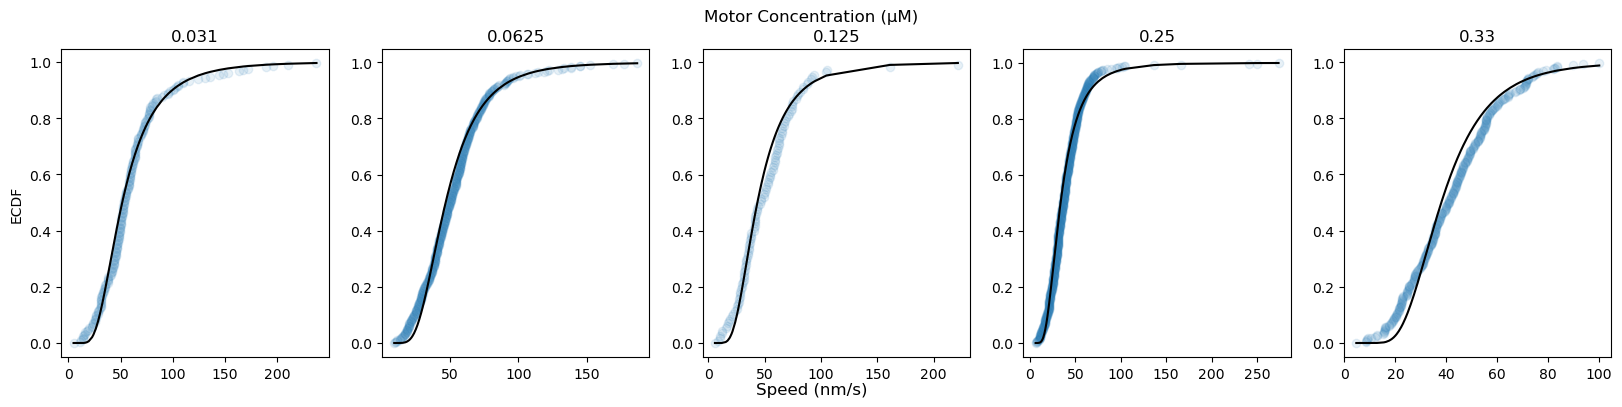

In [51]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])

fig, ax = plt.subplots(1, len(motor_concs[:-1]), figsize=(20, 4))
for i, conc in enumerate(motor_concs[:-1]):
    df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] == conc), :]
    speeds = np.sort(df_plot['speed (nm/s)'])
    ax[i].scatter(speeds, ecdf(speeds), alpha=0.1)
    
    mean = np.mean(df_plot['speed (nm/s)'])
    stdv = np.std(df_plot['speed (nm/s)'])
    alpha= (mean/stdv)**2 + 2
    beta = mean * ((mean/stdv)**2 +1)
    invgammadist = scipy.stats.invgamma.cdf(speeds, alpha, loc=0, scale=beta)
    ax[i].plot(speeds, invgammadist, label='Inverse Gamma', c='k')
    ax[i].set_title(conc)

ax[0].set_ylabel('ECDF', fontsize='10')
fig.suptitle('Motor Concentration (µM)')
fig.supxlabel('Speed (nm/s)')
#fig.savefig('../../analyzed_data/gliding/figures/motconc_dist.pdf')

In [52]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
len(np.where(df_plot['speed (nm/s)'] < 100)[0]), len(np.where(df_plot['speed (nm/s)'] > 100)[0])

(1557, 53)

# ATP
motor 0.0625, 0 ADP, 0 P

In [53]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals

In [54]:
param

NameError: name 'param' is not defined

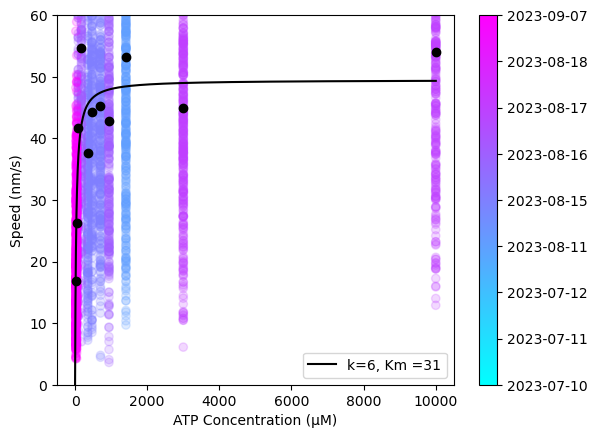

In [64]:
df_plot = df.loc[(df["motor conc"] == 0.0625) & (df["ADP"] == 0) & (df["P"] == 0), :]
ATP_mean = df_plot.groupby('ATP').mean().reset_index()

fig, ax = plt.subplots()
ax.scatter(df_plot['ATP'], df_plot['speed (nm/s)'], alpha=0.2, c = colormap(normalize([datedic[date] for date in df_plot['date']])))
ax.scatter(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], c='k')

param, curve, xval = kcatKm_curve_fit(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], np.max(ATP_mean['ATP']), 8, [100, 100])
ax.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ', Km =' + str(round(param[1])))
# ATPfit = np.polyfit(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], deg=1)
# ATPrsq = rsqrd(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], ATPfit[0], ATPfit[1])
# ax.plot(ATP_mean['ATP'], ATPfit[0]*ATP_mean['ATP'] + ATPfit[1], 
#          color='k', 
#          label=str(round(ATPfit[0],3)) + 'x + ' + str(round(ATPfit[1],1)) + ', r^2 = ' + str(round(ATPrsq, 2)))
ax.legend()
#ax.set_yscale('log')
ax.set_ylim(0,60)
#ax.set_xscale('log')
ax.set_xlabel('ATP Concentration (µM)')
ax.set_ylabel('Speed (nm/s)')
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/ATPvSpeed.pdf')

In [76]:
np.sum(df_plot['ATP']==705.0)

365

# ADP

In [14]:
np.unique(df['ADP'])

array([   0., 1000.])

# MT length
- individual movies/conditions?
- All

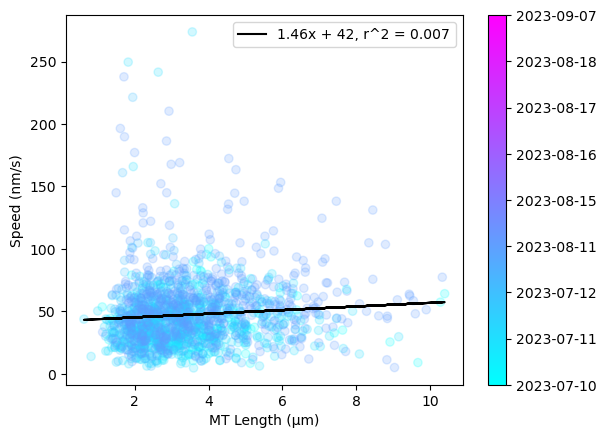

In [156]:
df_plot = df.loc[(df['ATP']==1410) & (df["ADP"] == 0) & (df["P"] == 0), :].reset_index()
fig, ax = plt.subplots()
ax.scatter(df_plot['MT len (um)'], 
           df_plot['speed (nm/s)'], 
           alpha=0.2,
           c = colormap(normalize([datedic[date] for date in df_plot['date']])))

nani = np.where(np.isnan(df_plot['MT len (um)']))[0]
lenfit = np.polyfit(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), deg=1)
lenrsq = rsqrd(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), lenfit[0], lenfit[1])
ax.plot(df_plot['MT len (um)'], lenfit[0]*df_plot['MT len (um)'] + lenfit[1], 
         color='k', 
         label=str(round(lenfit[0],2)) + 'x + ' + str(round(lenfit[1])) + ', r^2 = ' + str(round(lenrsq,3)))
ax.legend()
ax.set_ylabel('Speed (nm/s)')
ax.set_xlabel('MT Length (µm)')          

cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MTlenVSpeed.pdf')

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_2013/2438368617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


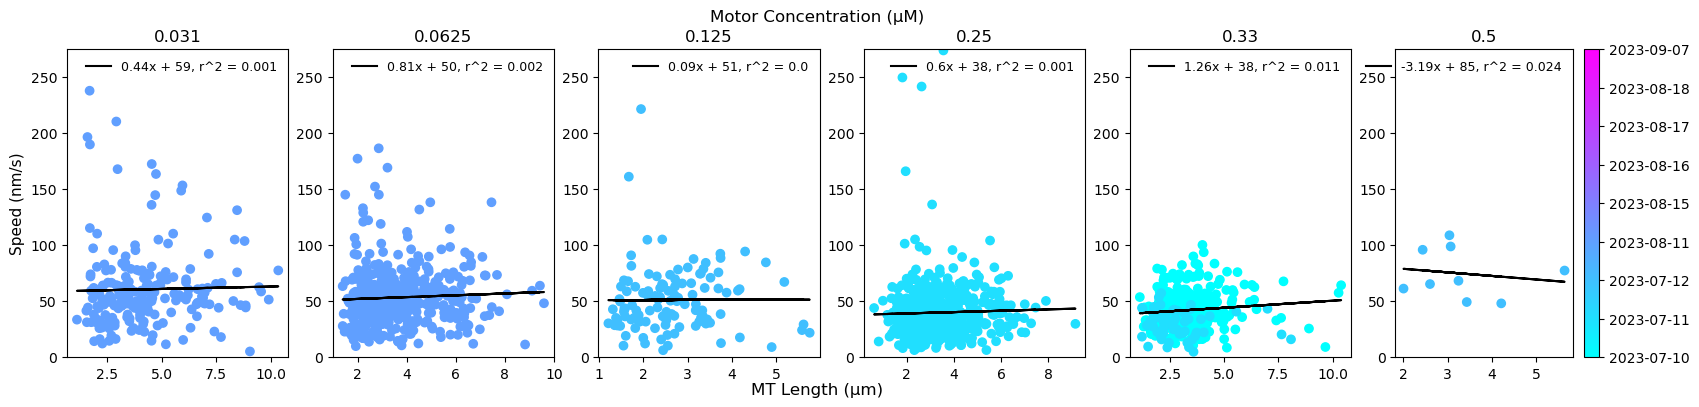

In [155]:
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])
fig, ax = plt.subplots(1,len(motor_concs), figsize=(20, 4))
for i, conc in enumerate(motor_concs):
    df_plot = df.loc[(df["motor conc"] == conc) & (df['ATP']==1410) & (df["ADP"] == 0) & (df["P"] == 0), :].reset_index()
    ax[i].scatter(df_plot['MT len (um)'], df_plot['speed (nm/s)'], c = colormap(normalize([datedic[date] for date in df_plot['date']])))
    ax[i].set_title(conc)
    
    #find if there are NaNs
    nani = np.where(np.isnan(df_plot['MT len (um)']))[0]
    
    lenfit = np.polyfit(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), deg=1)
    lenrsq = rsqrd(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), lenfit[0], lenfit[1])
    ax[i].plot(df_plot['MT len (um)'], lenfit[0]*df_plot['MT len (um)'] + lenfit[1], 
         color='k', 
         label=str(round(lenfit[0],2)) + 'x + ' + str(round(lenfit[1])) + ', r^2 = ' + str(round(lenrsq,3)))
    ax[i].legend(frameon=False, fontsize=9)
    ax[i].set_ylim(0, 275)

fig.suptitle('Motor Concentration (µM)')
fig.supxlabel('MT Length (µm)')
ax[0].set_ylabel('Speed (nm/s)', fontsize=11)

cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MTlenVSpeed_bymotor.pdf')

# General Time

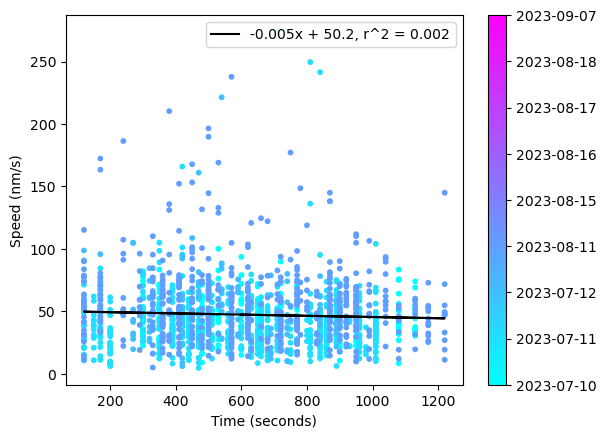

In [144]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0), :]

fig, ax = plt.subplots()
ax.scatter(df_plot['time (seconds)'], df_plot['speed (nm/s)'], s=10, c = colormap(normalize([datedic[date] for date in df_plot['date']])))
timefit = np.polyfit(df_plot['time (seconds)'], df_plot['speed (nm/s)'], deg=1)
timersq = rsqrd(df_plot['time (seconds)'], df_plot['speed (nm/s)'], timefit[0], timefit[1])
ax.plot(df_plot['time (seconds)'], timefit[0]*df_plot['time (seconds)'] + timefit[1], 
         color='k', 
         label=str(round(timefit[0],3)) + 'x + ' + str(round(timefit[1],1))+ ', r^2 = ' + str(round(timersq,3)))
ax.legend()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Speed (nm/s)')
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/AcqTimeVSpeed.pdf')

# By hand

In [17]:
byhand_df = pd.read_csv('../../analyzed_data/gliding/By-hand-compare_2023-07-10_Gliding_ATP1410um_2-start0_stop50.csv')
auto_df = df.loc[(df["file_name"] == '2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_0uMADP_0uMP_5min-start0_stop51.csv'), :].reset_index()
byhand_df = byhand_df.loc[np.in1d(byhand_df['index'], auto_df['index'])==True].reset_index()

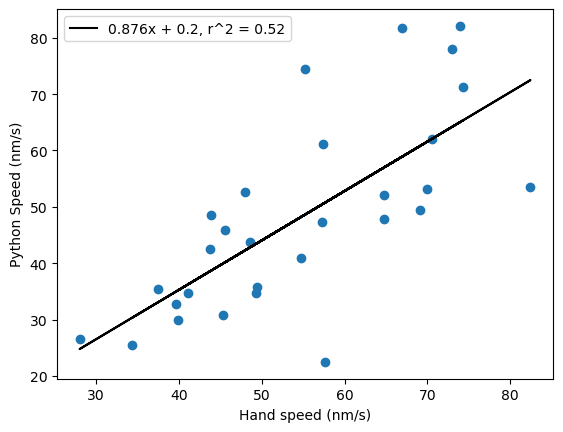

In [18]:
plt.scatter(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'])
handspeedfit = np.polyfit(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], deg=1)
hs_rsq = rsqrd(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], handspeedfit[0], handspeedfit[1])
plt.plot(byhand_df['hand speed (nm/s)'], handspeedfit[0]*byhand_df['hand speed (nm/s)'] + handspeedfit[1], 
         color='k', 
         label=str(round(handspeedfit[0],3)) + 'x + ' + str(round(handspeedfit[1],1)) + ', r^2 = ' + str(round(hs_rsq, 2)))

plt.xlabel('Hand speed (nm/s)')
plt.ylabel('Python Speed (nm/s)')
plt.legend()

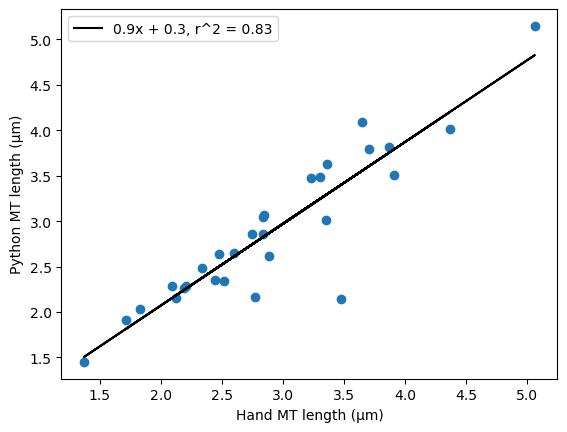

In [19]:
plt.scatter(byhand_df['hand length (um)'], auto_df['MT len (um)'])
handlenfit = np.polyfit(byhand_df['hand length (um)'], auto_df['MT len (um)'], deg=1)
hl_rsq = rsqrd(byhand_df['hand length (um)'], auto_df['MT len (um)'], handlenfit[0], handlenfit[1])
plt.plot(byhand_df['hand length (um)'], handlenfit[0]*byhand_df['hand length (um)'] + handlenfit[1], 
         color='k', 
         label=str(round(handlenfit[0],3)) + 'x + ' + str(round(handlenfit[1],1)) + ', r^2 = ' + str(round(hl_rsq, 2)))

plt.xlabel('Hand MT length (µm)')
plt.ylabel('Python MT length (µm)')
plt.legend()

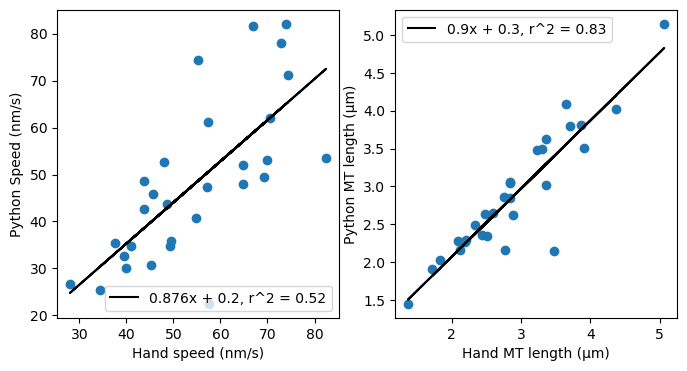

In [145]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'])
handspeedfit = np.polyfit(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], deg=1)
hs_rsq = rsqrd(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], handspeedfit[0], handspeedfit[1])
ax[0].plot(byhand_df['hand speed (nm/s)'], handspeedfit[0]*byhand_df['hand speed (nm/s)'] + handspeedfit[1], 
         color='k', 
         label=str(round(handspeedfit[0],3)) + 'x + ' + str(round(handspeedfit[1],1)) + ', r^2 = ' + str(round(hs_rsq, 2)))

ax[0].set_xlabel('Hand speed (nm/s)')
ax[0].set_ylabel('Python Speed (nm/s)')
ax[0].legend()


ax[1].scatter(byhand_df['hand length (um)'], auto_df['MT len (um)'])
handlenfit = np.polyfit(byhand_df['hand length (um)'], auto_df['MT len (um)'], deg=1)
hl_rsq = rsqrd(byhand_df['hand length (um)'], auto_df['MT len (um)'], handlenfit[0], handlenfit[1])
ax[1].plot(byhand_df['hand length (um)'], handlenfit[0]*byhand_df['hand length (um)'] + handlenfit[1], 
         color='k', 
         label=str(round(handlenfit[0],3)) + 'x + ' + str(round(handlenfit[1],1)) + ', r^2 = ' + str(round(hl_rsq, 2)))

ax[1].set_xlabel('Hand MT length (µm)')
ax[1].set_ylabel('Python MT length (µm)')
ax[1].legend()
#fig.savefig('../../analyzed_data/gliding/figures/ByHand.pdf')

## Gluteraldehyde

In [27]:
#Import files and add the names as strings to an array
Glut_file_path = '../../analyzed_data/gliding/2023-09-13_Gliding/'
# ff1 = '2023-07-10_Gliding/'
# ff2 = '2023-07-11_Gliding/'
# ff3 = '2023-07-12_Gliding/'
# ff4 = '2023-08-11_Gliding/'
# ff5 = '2023-08-15_Gliding/'
# ff6 = '2023-08-16_Gliding/'
# ff7 = '2023-08-17_Gliding/'
# ff8 = '2023-08-18_Gliding/'
# ff9 = '2023-09-07_Gliding/'
# ff = [ff1, ff2, ff3, ff4, ff5, ff6, ff7, ff8, ff9]
# included_files = '*.csv'

Glut_data_csv = []
Glut_path = Glut_file_path+included_files
Glut_data_csv = np.sort(glob.glob(Glut_path))

#Convert file names to a dataframe
Glut_dfs = []
for file in Glut_data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    Glut_dfs.append(temp_df)
Glut_df=pd.concat(Glut_dfs)

#reset the index and drop any extraneous columns
Glut_df=Glut_df.reset_index()
Glut_df=Glut_df.drop(columns=['Unnamed: 0', 'level_0'])

In [28]:
Glut_data_csv

array(['../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_2-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_3-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_4-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_5-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_6-start0_stop51.csv'],
      dtype='<U138')

In [29]:
Glut_df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,skele r^2,MT len (um),motor conc,MT dilute,ATP,ADP,P,time (seconds),date,file_name
0,0,31,39.083272,2.874851,28.419355,329.000000,-1.155322,2,57.650385,0.860484,0.977612,3.795111,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
1,1,37,44.377267,1.426823,85.243243,301.000000,-1.295527,5,25.373891,0.971362,0.852574,6.073580,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
2,3,27,31.469779,1.400102,103.000000,486.407407,-0.141581,7,42.229722,0.978526,0.868030,3.558225,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
3,4,53,67.537633,2.154805,109.849057,112.000000,1.133468,8,83.217330,0.911577,0.584382,6.609229,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
4,5,69,85.779112,1.866322,146.405797,262.000000,1.190889,9,70.075068,0.977209,0.996088,9.575393,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
5,6,57,65.807851,1.883874,164.000000,378.333333,-0.001233,10,91.260045,0.992865,0.977062,5.666578,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
6,7,49,69.588109,1.379570,173.000000,488.714286,0.621814,11,64.851674,0.995896,0.967801,7.443439,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
7,8,62,71.858007,1.577097,174.016129,206.500000,1.483119,13,91.464027,0.995951,0.984018,7.010812,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
8,9,65,76.042474,2.235577,228.000000,279.230769,0.162085,14,69.047873,0.929287,0.920040,9.351270,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
9,10,62,79.804757,1.239283,283.677419,182.500000,1.112798,16,95.033502,0.976333,0.674192,8.338983,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...


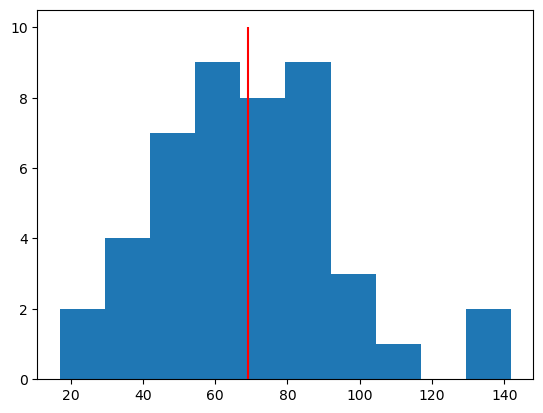

In [31]:
plt.hist(Glut_df['speed (nm/s)'])
plt.vlines(np.mean(Glut_df['speed (nm/s)']), 0, 10, color='red')